# **Ruby Nouri Kermani - 30261323**

##**Part 1: Data Cleaning and Preprocessing**

###1.1 Load and Inspect the Dataset

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


energy_data = pd.read_csv('/content/Building_Energy_Benchmarking.csv')
# loading the dataset

display(energy_data)
print('\n')
display(energy_data.shape)
# diplaying dataset's shape, columns, and data types


,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),District Hot Water Use (GJ),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,280,152.4,368616,5453,NaN,NaN,368616.0,171.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,243,31.2,1091854,4725,NaN,NaN,1091854.0,508.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0,0.0,508589,3,2180,NaN,508589.0,236.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468,...,26,1.5,1152308,506,6582,NaN,1152308.0,536.0,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,...,253,118.1,508594,4926,NaN,NaN,508594.0,236.0,2023,2023-21988603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,21988624,Senior Services,311 34 AV SE,Calgary,T2G 1T7,Alberta,Office,1,1960,768,...,50,65.6,25615,980,NaN,NaN,25615.0,12.0,2022,2022-21988624
490,21988625,Fire Station #25,4705 76 AV SE,Calgary,T2C 2X1,Alberta,Fire Station,1,1982,1108,...,53,48.2,83298,1040,NaN,NaN,83298.0,39.0,2022,2022-21988625
491,21988627,EMS #6,1940 WESTMOUNT BV NW,Calgary,T2N 3G8,Alberta,Other - Public Services,1,1964,425,...,40,94.5,20725,782,NaN,NaN,20725.0,10.0,2022,2022-21988627
492,21988628,Fire Station #24,2607 106 AV SW,Calgary,T2W 4H7,Alberta,Fire Station,1,1978,1108,...,41,36.8,102861,794,NaN,541.0,103402.0,48.0,2022,2022-21988628


(494, 31)

In [47]:
display(energy_data.info())
print('\n')
display(energy_data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Property Id                                                            494 non-null    int64  
 1   Property Name                                                          494 non-null    object 
 2   Address 1                                                              494 non-null    object 
 3   City                                                                   494 non-null    object 
 4   Postal Code                                                            494 non-null    object 
 5   Province                                                               494 non-null    object 
 6   Primary Property Type - Self Selected                                  494 non-null    obj

None

,0
Property Id,int64
Property Name,object
Address 1,object
City,object
Postal Code,object
Province,object
Primary Property Type - Self Selected,object
Number of Buildings,int64
Year Built,int64
Property GFA - Self-Reported (m²),object


In [48]:
missing_values_engdata = energy_data.isnull().sum()
print(missing_values_engdata)
# finding the number of missing values in each column

Property Id                                                                0
Property Name                                                              0
Address 1                                                                  0
City                                                                       0
Postal Code                                                                0
Province                                                                   0
Primary Property Type - Self Selected                                      0
Number of Buildings                                                        0
Year Built                                                                 0
Property GFA - Self-Reported (m²)                                          0
ENERGY STAR Score                                                        329
Site Energy Use (GJ)                                                       0
Weather Normalized Site Energy Use (GJ)                                    0

### 1.2 Handling Missing Data

In [49]:
missing_values_percentage = (energy_data.isnull().sum() / len(energy_data)) * 100
print(missing_values_percentage)
print('\n')
# finding the percentage of columns

drop_columns = missing_values_percentage[missing_values_percentage > 40].index
energy_data_dropped = energy_data.drop(columns=drop_columns)
# dropping columns with more than 40% missing values

missingvalue = energy_data_dropped.isnull().sum() / len(energy_data_dropped) * 100
print(missingvalue)
# just to make sure what columns with missing values are left


Property Id                                                               0.000000
Property Name                                                             0.000000
Address 1                                                                 0.000000
City                                                                      0.000000
Postal Code                                                               0.000000
Province                                                                  0.000000
Primary Property Type - Self Selected                                     0.000000
Number of Buildings                                                       0.000000
Year Built                                                                0.000000
Property GFA - Self-Reported (m²)                                         0.000000
ENERGY STAR Score                                                        66.599190
Site Energy Use (GJ)                                                      0.000000
Weat

In [50]:
# using mode / most frequence
# for categorical columns
categorical_columns = energy_data_dropped.select_dtypes(include=['object']).columns
energy_data_dropped[categorical_columns] = energy_data_dropped[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))
# filling the missing values of categorical columns with mode

#for numerical columns
# using median
from sklearn.impute import SimpleImputer

num_columns = energy_data_dropped.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy = 'median')
energy_data_dropped[num_columns] = imputer.fit_transform(energy_data_dropped[num_columns])

int64_columns = energy_data_dropped.select_dtypes(include=['int64']).columns
energy_data_dropped[int64_columns] = energy_data_dropped[int64_columns].apply(lambda x:x.fillna(x.median()).astype(int))
# filling the missing values of numerical columns with median

print(energy_data_dropped.isnull().mean()*100)

Property Id                                   0.0
Property Name                                 0.0
Address 1                                     0.0
City                                          0.0
Postal Code                                   0.0
Province                                      0.0
Primary Property Type - Self Selected         0.0
Number of Buildings                           0.0
Year Built                                    0.0
Property GFA - Self-Reported (m²)             0.0
Site Energy Use (GJ)                          0.0
Weather Normalized Site Energy Use (GJ)       0.0
Site EUI (GJ/m²)                              0.0
Weather Normalized Site EUI (GJ/m²)           0.0
Source Energy Use (GJ)                        0.0
Weather Normalized Source Energy Use (GJ)     0.0
Source EUI (GJ/m²)                            0.0
Weather Normalized Source EUI (GJ/m²)         0.0
Total GHG Emissions (Metric Tons CO2e)        0.0
Total GHG Emissions Intensity (kgCO2e/m²)     0.0


### 1.3 Extracting and Cleaning Data Using Regex

In [51]:
# Using Regex
dt_energy = energy_data_dropped.copy()
# rename the dataframe for easy access

obj_col = dt_energy.select_dtypes(include=['object']).columns
# checking all text-based columns

def is_numeric(col):
  return dt_energy[col].str.match(r"^\d+(\.\d+)?$").sum() / len(dt_energy)
# checking if selected columns have numeric values

object_columns = [col for col in obj_col if is_numeric(col)]
print(object_columns)
# Apply function to all object columns
# extracting all text-based numerical columns in a list


['Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)', 'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions (Metric Tons CO2e)', 'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)']


In [52]:
# Postal codes in A1A 1A1 format
import re

def format_postal_codes(postal_code):
  postal_code = re.sub(r"[^A-Za-z0-9]", "", postal_code).upper()
  # using regex
  # remove anything other than alphabet and numbers + change them to upper case
  if len(postal_code) == 6:
    return f"{postal_code[:3]} {postal_code[3:]}"
    # adding the space after the first 3 characters and before the last 3 characters
  return postal_code

dt_energy["Postal Code"] = dt_energy["Postal Code"].apply(format_postal_codes)
print(dt_energy["Postal Code"])

# the challenging part was to add the space


0      T2H 0Z4
1      T2E 7L7
2      T2G 0W2
3      T2G 0G2
4      T2G 4M7
        ...   
489    T2G 1T7
490    T2C 2X1
491    T2N 3G8
492    T2W 4H7
493    T3A 5G1
Name: Postal Code, Length: 494, dtype: object


In [53]:
# Clean and Extract meaningful text

# removing # from property names
# correcting the abbreviations

import re

def property_cleaning(name):
  name = re.sub(r"#", "", name)
  return name.strip()

dt_energy["Property Name"] = dt_energy["Property Name"].apply(property_cleaning)


def address_cleaning(address):
  address = address.lower()
  address = address.title()
  #changing all addresses to lower case and starting with Capital letter
  address = re.sub(r"\bst\b", "Street", address, flags=re.I)
  # using flags=re.I to make the string case insensitive
  address = re.sub(r"\b(ave|av)\b", "Avenue", address, flags=re.I)
  address = re.sub(r"\brd\b", "Road", address, flags=re.I)
  address = re.sub(r"\btr\b", "Trail", address, flags=re.I)
  address = re.sub(r"\b(bv|blvd)\b", "Boulevard", address, flags=re.I)
  address = re.sub(r"\bwy\b", "Way", address, flags=re.I)
  address = re.sub(r"\bdr\b", "Drive", address, flags=re.I)
  address = re.sub(r"\bne\b", "NE", address, flags=re.I)
  address = re.sub(r"\bnw\b", "NW", address, flags=re.I)
  address = re.sub(r"\bse\b", "SE", address, flags=re.I)
  address = re.sub(r"\bsw\b", "SW", address, flags=re.I)
  return address

dt_energy["Address 1"] = dt_energy["Address 1"].apply(address_cleaning)

print(dt_energy[["Property Name", "Address 1"]])


# https://docs.python.org/3/library/re.html

                       Property Name                     Address 1
0    Acadia Aquatic & Fitness Centre       9009 Fairmount Drive SE
1                         Ad Valorem             2924 11 Street NE
2               Alberta Trade Centre              315 10 Avenue SE
3                     Andrew Davison               133 6 Avenue SE
4             Animal Services Centre       2201 Portland Street SE
..                               ...                           ...
489                  Senior Services              311 34 Avenue SE
490                  Fire Station 25             4705 76 Avenue SE
491                            EMS 6   1940 Westmount Boulevard NW
492                  Fire Station 24            2607 106 Avenue SW
493                  Fire Station 36  10071 Hidden Valley Drive NW

[494 rows x 2 columns]


In [54]:
# converting the list of text-based numeric columns to numerical type
dt_energy[object_columns] = dt_energy[object_columns].apply(pd.to_numeric, errors="coerce")
print(dt_energy.dtypes)
print('\n')

# Checking the numerical types
from pandas.api.types import is_numeric_dtype

columns_to_check = dt_energy.iloc[:, 9:]

for column in columns_to_check:
  column_dtype = dt_energy[column].dtype
  is_numeric = is_numeric_dtype(column_dtype)
  print(f"Is '{column}' numeric? {is_numeric}")

# https://pandas.pydata.org/docs/dev/reference/api/pandas.api.types.is_numeric_dtype.html

Property Id                                     int64
Property Name                                  object
Address 1                                      object
City                                           object
Postal Code                                    object
Province                                       object
Primary Property Type - Self Selected          object
Number of Buildings                             int64
Year Built                                      int64
Property GFA - Self-Reported (m²)             float64
Site Energy Use (GJ)                          float64
Weather Normalized Site Energy Use (GJ)       float64
Site EUI (GJ/m²)                              float64
Weather Normalized Site EUI (GJ/m²)           float64
Source Energy Use (GJ)                        float64
Weather Normalized Source Energy Use (GJ)     float64
Source EUI (GJ/m²)                            float64
Weather Normalized Source EUI (GJ/m²)         float64
Total GHG Emissions (Metric 

##**Part 2: Exploratory Data Analysis (EDA) and Aggregations**

###2.1 Statistical Summary

In [55]:
# summary statistics for numerical features

numerical_features = dt_energy.select_dtypes(include=['float64', 'int64'])
summary_stats = numerical_features.describe()
display(summary_stats)

,Property Id,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Weather Normalized Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source Energy Use (GJ),Weather Normalized Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending
count,4.940000e+02,494.000000,494.000000,257.000000,242.000000,242.000000,494.000000,494.000000,232.000000,232.000000,494.000000,494.000000,446.000000,494.000000,484.000000,494.000000,1.970000e+02,295.000000,494.000000
mean,1.308877e+07,1.060729,1980.091093,3789.813619,7312.646694,7542.010331,1.774798,1.810324,9690.655603,8847.246552,2.282753,2.319717,489.819507,158.671660,218.037190,63.821862,6.363971e+05,4225.331186,2020.995951
std,5.659556e+06,0.278281,25.159568,9062.945537,21685.613955,21910.996996,1.306700,1.331529,25681.955176,24456.736456,1.597846,1.622897,1125.318616,109.472637,720.507167,56.835735,1.228276e+06,17732.486853,1.414208
min,6.169481e+06,1.000000,1896.000000,113.000000,141.000000,146.000000,0.060000,0.060000,237.000000,146.000000,0.110000,0.110000,15.000000,10.200000,0.000000,0.000000,1.139300e+04,3.000000,2019.000000
25%,9.563763e+06,1.000000,1970.000000,793.100000,801.550000,844.775000,0.990000,1.000000,961.100000,985.000000,1.312500,1.350000,108.100000,93.100000,42.875000,33.325000,1.028610e+05,689.300000,2020.000000
50%,9.997794e+06,1.000000,1978.000000,1385.000000,1782.500000,1826.500000,1.290000,1.310000,2443.500000,2122.500000,1.680000,1.690000,197.050000,117.600000,75.750000,43.900000,2.285350e+05,959.700000,2021.000000
75%,2.198860e+07,1.000000,1996.000000,2893.000000,5809.750000,6072.750000,2.065000,2.110000,7860.500000,7314.000000,2.622500,2.652500,482.325000,186.975000,226.625000,74.050000,5.788240e+05,2612.000000,2022.000000
max,2.198863e+07,3.000000,2018.000000,85941.000000,243202.000000,242611.000000,8.430000,8.360000,261481.000000,260399.000000,10.130000,10.060000,13067.000000,666.200000,12243.000000,386.000000,9.618602e+06,238415.000000,2023.000000


In [56]:
# identify and explain key observations (outliers, mean vs. median difference)

# outliers:
def outlier_iqr(data, column):
  Q1 = data[column].quantile(0.25) # '25%' row in summary_stats
  Q3 = data[column].quantile(0.75) # '75%' row in summary_stats
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  return outliers
# define a function to use IQR method

numerical_features = dt_energy.select_dtypes(include=['float64', 'int64'])
# recalling numerical columns

for column in numerical_features.columns:
  outliers = outlier_iqr(numerical_features, column)
  if not outliers.empty:
    print(f"Number of outliers in '{column}':")
    display(outliers.shape[0])
  else:
    print(f"No outliers found in '{column}'.")
# looping through numerical columns, one by one
# showing the number of outliers in each column



No outliers found in 'Property Id'.
Number of outliers in 'Number of Buildings':


25

Number of outliers in 'Year Built':


25

Number of outliers in 'Property GFA - Self-Reported (m²)':


34

Number of outliers in 'Site Energy Use (GJ)':


24

Number of outliers in 'Weather Normalized Site Energy Use (GJ)':


23

Number of outliers in 'Site EUI (GJ/m²)':


45

Number of outliers in 'Weather Normalized Site EUI (GJ/m²)':


44

Number of outliers in 'Source Energy Use (GJ)':


23

Number of outliers in 'Weather Normalized Source Energy Use (GJ)':


23

Number of outliers in 'Source EUI (GJ/m²)':


50

Number of outliers in 'Weather Normalized Source EUI (GJ/m²)':


51

Number of outliers in 'Total GHG Emissions (Metric Tons CO2e)':


28

Number of outliers in 'Total GHG Emissions Intensity (kgCO2e/m²)':


42

Number of outliers in 'Direct GHG Emissions (Metric Tons CO2e)':


29

Number of outliers in 'Direct GHG Emissions Intensity (kgCO2e/m²)':


55

Number of outliers in 'Electricity Use - Grid Purchase (kWh)':


22

Number of outliers in 'Natural Gas Use (GJ)':


41

No outliers found in 'Year Ending'.


In [57]:
# mean vs. median

def mean_vs_median(summary_stats):
  for column in summary_stats.columns:
    mean_value = summary_stats.loc['mean', column]
    # calling the 'mean' row from summary_stats
    median_value = summary_stats.loc['50%', column]
    # calling the '50%' or median from summary_stats
    print(f"Column: {column}")
    if mean_value > median_value:
      print("Right-skewed (mean > median)\n")
      # mean bigger than median - right-skewed distribution
    elif mean_value < median_value:
      print("Left-skewed (mean < median)\n")
      # mean smaller than median - left-skewed distribution
    else:
      print("Symmetrical (mean ~ median)\n")
      # approximately symmetrical (normal) distribution

# define a function to compare between Mean and Median

mean_vs_median(summary_stats)

# this comparison would have been better


Column: Property Id
Right-skewed (mean > median)

Column: Number of Buildings
Right-skewed (mean > median)

Column: Year Built
Right-skewed (mean > median)

Column: Property GFA - Self-Reported (m²)
Right-skewed (mean > median)

Column: Site Energy Use (GJ)
Right-skewed (mean > median)

Column: Weather Normalized Site Energy Use (GJ)
Right-skewed (mean > median)

Column: Site EUI (GJ/m²)
Right-skewed (mean > median)

Column: Weather Normalized Site EUI (GJ/m²)
Right-skewed (mean > median)

Column: Source Energy Use (GJ)
Right-skewed (mean > median)

Column: Weather Normalized Source Energy Use (GJ)
Right-skewed (mean > median)

Column: Source EUI (GJ/m²)
Right-skewed (mean > median)

Column: Weather Normalized Source EUI (GJ/m²)
Right-skewed (mean > median)

Column: Total GHG Emissions (Metric Tons CO2e)
Right-skewed (mean > median)

Column: Total GHG Emissions Intensity (kgCO2e/m²)
Right-skewed (mean > median)

Column: Direct GHG Emissions (Metric Tons CO2e)
Right-skewed (mean > media

###2.2 Aggregations

In [58]:
# average Energy Use Intensity (EUI) by Property Type.

# not specified by Source EUI or Site EUI
# choosing columns with GJ/m² metric

# Site EUI (GJ/m²)
# Source EUI (GJ/m²)

eui_prop_type = dt_energy.groupby('Primary Property Type - Self Selected')[['Site EUI (GJ/m²)', 'Source EUI (GJ/m²)']].agg('mean')
display(eui_prop_type)


,Site EUI (GJ/m²),Source EUI (GJ/m²)
Primary Property Type - Self Selected,,
Distribution Center,3.286000,3.496000
Fire Station,1.208827,1.572849
Fitness Center/Health Club/Gym,4.385000,5.306750
Heated Swimming Pool,4.805333,5.895333
Ice/Curling Rink,2.182200,2.862400
Indoor Arena,1.106000,1.358000
Mixed Use Property,0.458000,0.522000
Museum,1.584000,2.050000
Non-Refrigerated Warehouse,0.768000,1.039333


In [59]:
# total Greenhouse Gas (GHG) emmisions by year

# not specified by year ending or year built.

# grouping by Year Built and Year Ending
ghg_year = dt_energy.groupby(['Year Built', 'Year Ending'])['Total GHG Emissions (Metric Tons CO2e)'].sum()
display(ghg_year)

Year Built  Year Ending
1896        2019              18.6
            2020              16.8
            2021              19.3
            2022              19.0
            2023              15.0
                            ...   
2018        2019             507.6
            2020             516.3
            2021             454.7
            2022            9329.0
            2023           13475.0
Name: Total GHG Emissions (Metric Tons CO2e), Length: 255, dtype: float64

In [60]:
# top 5 properties with highest total energy consumption

# Energy Consumption includes:
  #Electricity Use - Grid Purchase (kWh)
  #Natural Gas Use (GJ)

# but Electricity use is in kWh and gas use is in GJ
# converting kwh to GJ


kwh_to_gj = 0.0036
# https://www.unitconverters.net/energy/kilowatt-hour-to-gigajoule.htm

dt_energy['Electricity Use (GJ)'] = dt_energy['Electricity Use - Grid Purchase (kWh)'] * kwh_to_gj
# creating a new column to put the converted values of electricity use

energy_by_prop = dt_energy.groupby(['Property Name', 'Property Id'])[['Electricity Use (GJ)', 'Natural Gas Use (GJ)']].sum()
# grouping and calculating the total
top_5 = energy_by_prop.nlargest(5, ['Electricity Use (GJ)', 'Natural Gas Use (GJ)'])
print(top_5)
# display top 5

print('\n')
#OR

# total energy = electricity use + gas use
dt_energy['Total Energy (GJ)'] = dt_energy['Electricity Use (GJ)'] + dt_energy['Natural Gas Use (GJ)']
# creating a new column for total energy
energy_by_prop1 = dt_energy.groupby(['Property Name', 'Property Id'])['Total Energy (GJ)'].sum()
# grouping and calculating the total
top_5 = energy_by_prop1.nlargest(5)
print(top_5)


# OR
# maybe total energy consumption = site energy use
print('\n')
energy_by_prop2 = dt_energy.groupby(['Property Name', 'Property Id'])['Site Energy Use (GJ)'].sum()
top_5 = energy_by_prop2.nlargest(5)
print(top_5)



                                             Electricity Use (GJ)  \
Property Name                   Property Id                         
Municipal Complex               8854298                66763.9728   
Emergency Operations Centre     10170296               31898.8476   
Southland Leisure Centre        21988617               30991.6152   
Whitehorn Multi-Services Centre 9601861                27006.3288   
Max Bell and Ken Bracko Arenas  9265818                20236.8060   

                                             Natural Gas Use (GJ)  
Property Name                   Property Id                        
Municipal Complex               8854298                    2313.0  
Emergency Operations Centre     10170296                   7138.0  
Southland Leisure Centre        21988617                  79969.0  
Whitehorn Multi-Services Centre 9601861                   10084.0  
Max Bell and Ken Bracko Arenas  9265818                   25525.0  


Property Name                         

###2.3 Detecting Outliers Using Regex and IQR

In [61]:
# Using Regex only

# identify values that don't conform to expected numeric formats
import re

def find_numeric(value):
  if isinstance(value, (int, float)):
    return True
    # automatically matches the numeric format
  pattern = r"[^0-9.,\s]"
  # regex pattern to find any non-numeric values
  if re.search(pattern, str(value)):
    return False
    # it contains non-numeric
  else:
    return True
    # contains only numeric

is_it_numeric = dt_energy[:].map(find_numeric)
display(is_it_numeric)
# checking all rows and columns for numeric formats

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID,Electricity Use (GJ),Total Energy (GJ)
0,True,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,False,True,True
1,True,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,False,True,True
2,True,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,False,True,True
3,True,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,False,True,True
4,True,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,True,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,False,True,True
490,True,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,False,True,True
491,True,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,False,True,True
492,True,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,False,True,True


In [62]:
# remove or correct incorrectly formatted numeric values.

import re

def extract_numeric(value):
  value = str(value)
  match = re.findall(r"[\d,]+\.?\d*", value)
  # using regex to identify objects that are numeric text-values
  if match:
      return float(match[0].replace(",", ""))
      # removing commas, convert to float64
  return None

print(dt_energy.dtypes)

Property Id                                     int64
Property Name                                  object
Address 1                                      object
City                                           object
Postal Code                                    object
Province                                       object
Primary Property Type - Self Selected          object
Number of Buildings                             int64
Year Built                                      int64
Property GFA - Self-Reported (m²)             float64
Site Energy Use (GJ)                          float64
Weather Normalized Site Energy Use (GJ)       float64
Site EUI (GJ/m²)                              float64
Weather Normalized Site EUI (GJ/m²)           float64
Source Energy Use (GJ)                        float64
Weather Normalized Source Energy Use (GJ)     float64
Source EUI (GJ/m²)                            float64
Weather Normalized Source EUI (GJ/m²)         float64
Total GHG Emissions (Metric 

In [63]:
# apply IQR method to detect outliers in 'Total GHG Emissions (Metric Tons CO2e)'
Q1 = dt_energy['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.25)
Q3 = dt_energy['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers1 = (dt_energy['Total GHG Emissions (Metric Tons CO2e)'] < lower_bound) | (dt_energy['Total GHG Emissions (Metric Tons CO2e)'] > upper_bound)


In [64]:
# Replace outliers with median for property type

median_replace = dt_energy.groupby('Primary Property Type - Self Selected')['Total GHG Emissions (Metric Tons CO2e)'].transform('median')
dt_energy.loc[outliers1.index, 'Total GHG Emissions (Metric Tons CO2e)'] = median_replace[outliers1.index]

##**Part 3: Data Visualization**

###3.1 Time-Series Visualization

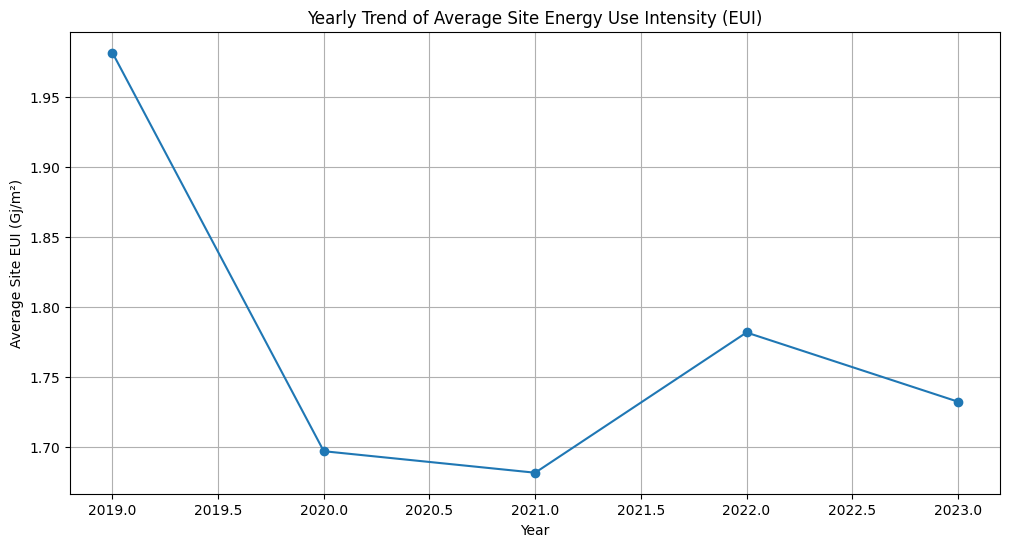

In [65]:
# plot yearly trend of average Site Energy Use Intensity (EUI)
import matplotlib.pyplot as plt

year_eui = dt_energy.groupby(['Year Ending'])['Site EUI (GJ/m²)'].mean()
# grouping year with average Site EUI
year_eui.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Yearly Trend of Average Site Energy Use Intensity (EUI)')
plt.xlabel('Year')
plt.ylabel('Average Site EUI (Gj/m²)')
plt.grid(True)
plt.show()

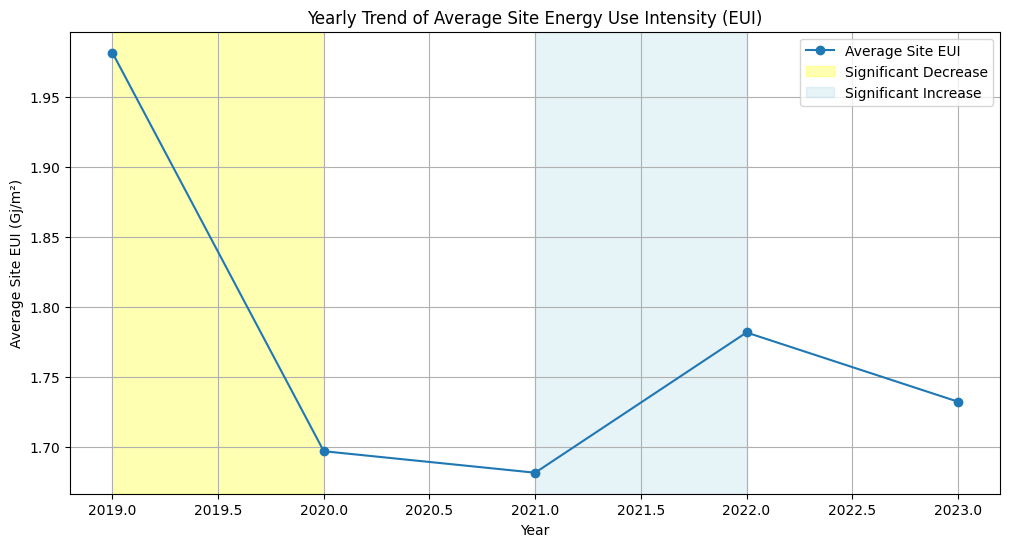

In [66]:
# Highlight significant increases or decreases in energy usuage

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(year_eui.index, year_eui.values, marker='o', label='Average Site EUI')

plt.axvspan(2019, 2020, color='yellow', alpha=0.3, label='Significant Decrease')
plt.axvspan(2021, 2022, color='lightblue', alpha=0.3, label='Significant Increase')
# making it more visible to see the changes in the plot

plt.title('Yearly Trend of Average Site Energy Use Intensity (EUI)')
plt.xlabel('Year')
plt.ylabel('Average Site EUI (Gj/m²)')
plt.grid(True)
plt.legend()
plt.show()

###3.2 Comparative Bar Charts

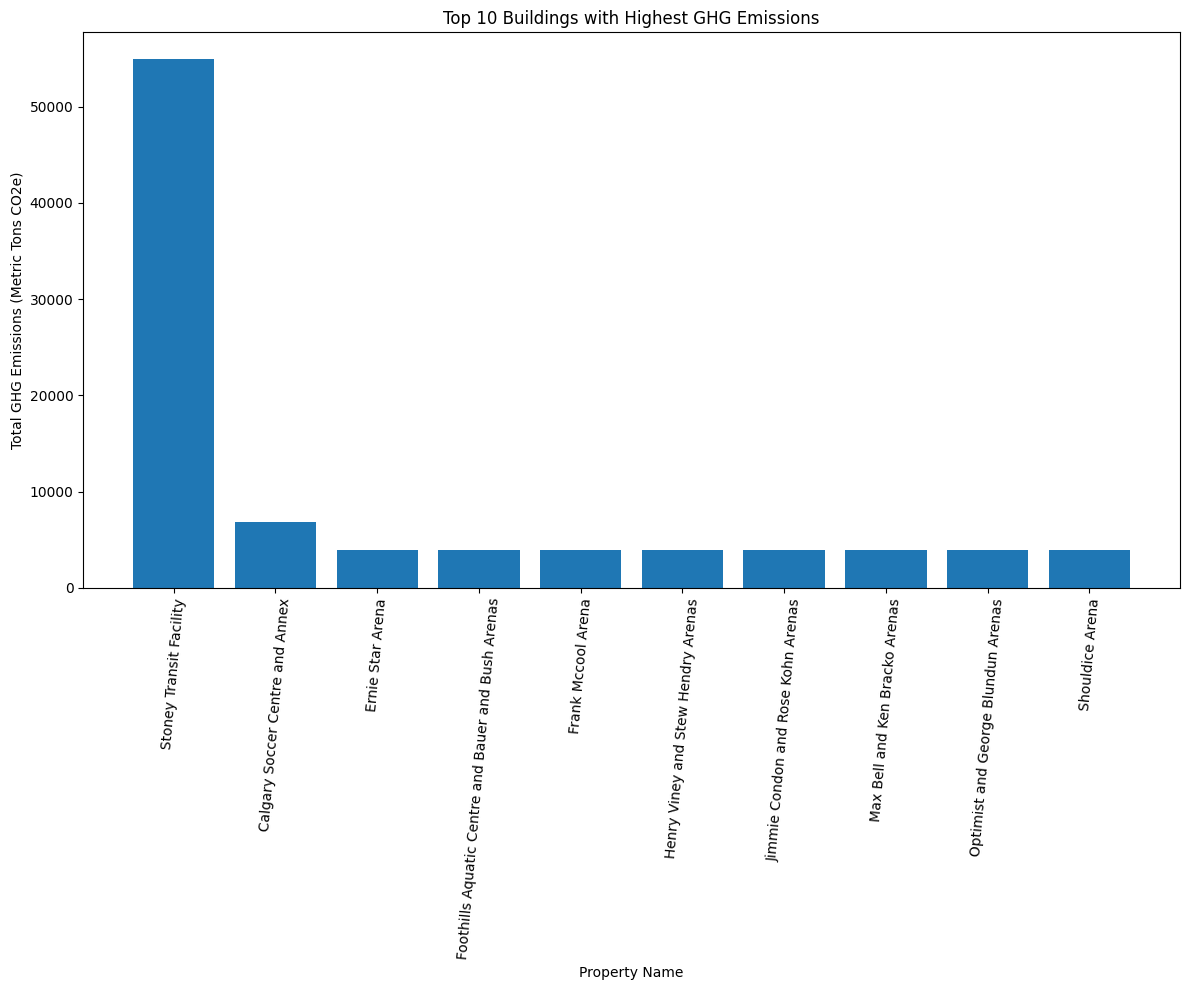

In [67]:
# bar chart showing top 10 buildings with highest GHG emission
import matplotlib.pyplot as plt

# Grouping data by property name and sum GHG emissions
ghg_emissions_by_property = dt_energy.groupby('Property Name')['Total GHG Emissions (Metric Tons CO2e)'].sum()

# Selecting the top 10 buildings
top_10_buildings = ghg_emissions_by_property.nlargest(10)

plt.figure(figsize=(12, 10))
plt.bar(top_10_buildings.index, top_10_buildings.values)
plt.xlabel("Property Name")
plt.ylabel("Total GHG Emissions (Metric Tons CO2e)")
plt.title("Top 10 Buildings with Highest GHG Emissions")
plt.xticks(rotation=85)
# Rotating x-axis labels
plt.tight_layout()
# Adjusting layout to prevent labels from overlapping
plt.show()

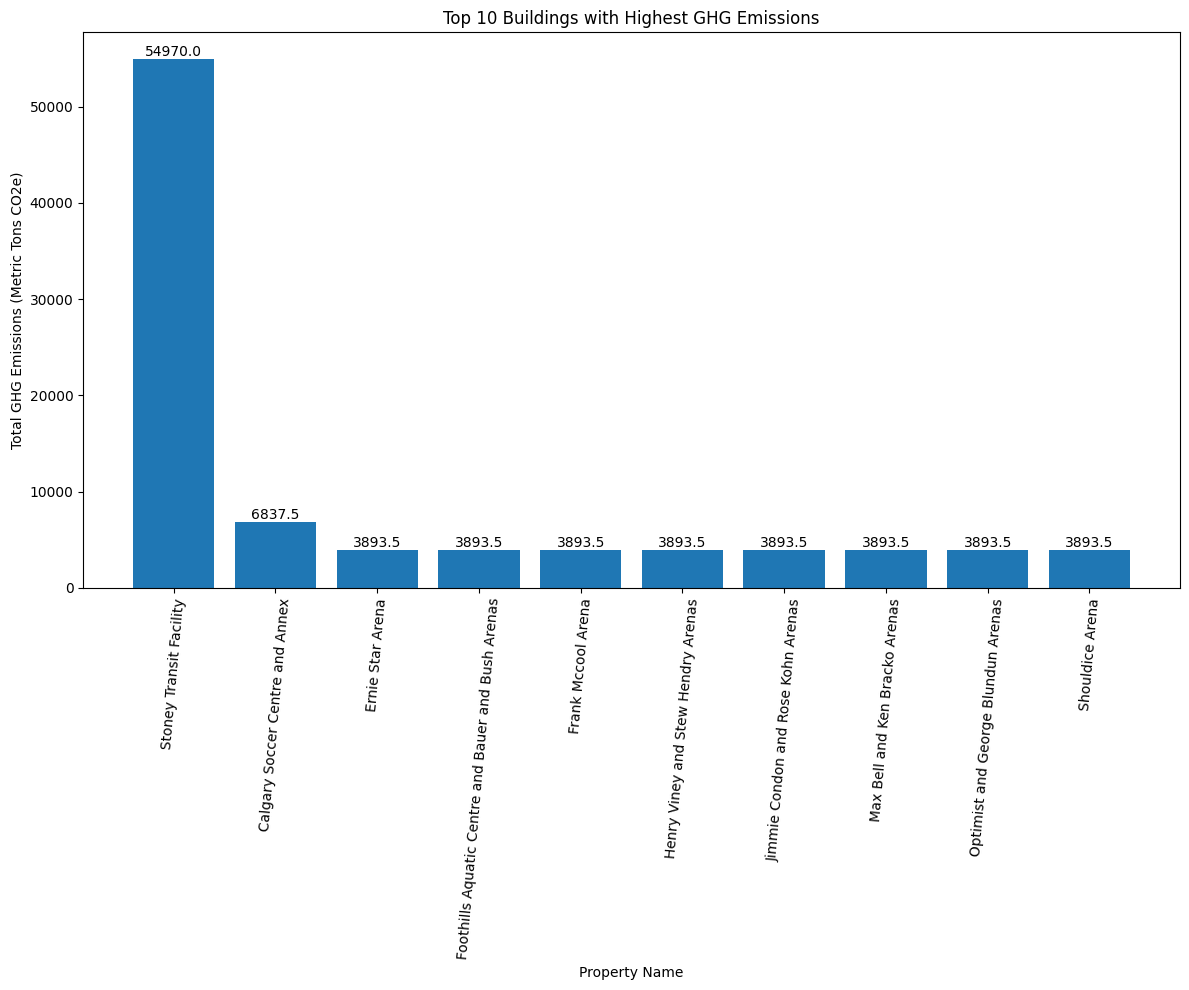

In [68]:
# annotate bar chart with emission values

plt.figure(figsize=(12, 10))
plt.bar(top_10_buildings.index, top_10_buildings.values)
plt.xlabel("Property Name")
plt.ylabel("Total GHG Emissions (Metric Tons CO2e)")
plt.title("Top 10 Buildings with Highest GHG Emissions")
plt.xticks(rotation=85)
plt.tight_layout()
# adding the annotation
for i, v in enumerate(top_10_buildings.values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.show()


###3.3 Heatmap Visualization

<Axes: ylabel='Primary Property Type - Self Selected'>

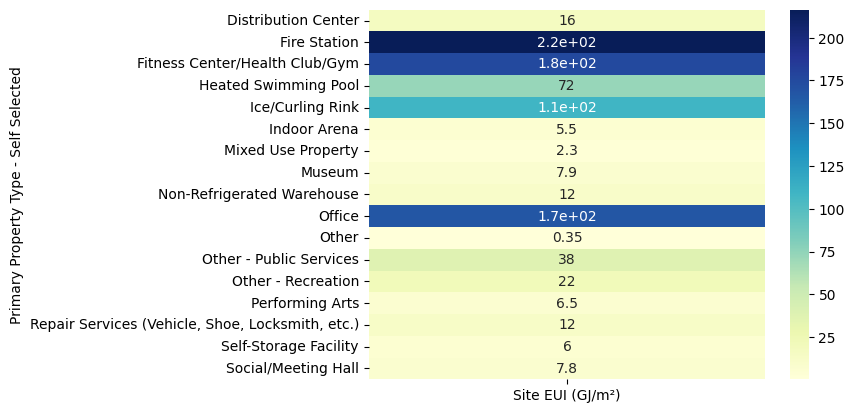

In [69]:
# heatmap of energy usage intensity (Site EUI) across different property types

import seaborn as sns
import matplotlib.pyplot as plt

energy_by_proptype = dt_energy.groupby(['Primary Property Type - Self Selected'])['Site EUI (GJ/m²)'].sum().reset_index()
heatmap_data = energy_by_proptype.pivot_table(index='Primary Property Type - Self Selected', values='Site EUI (GJ/m²)')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True)

##**Part 4: Further Analysis**

###4.1 Correlation Analysis

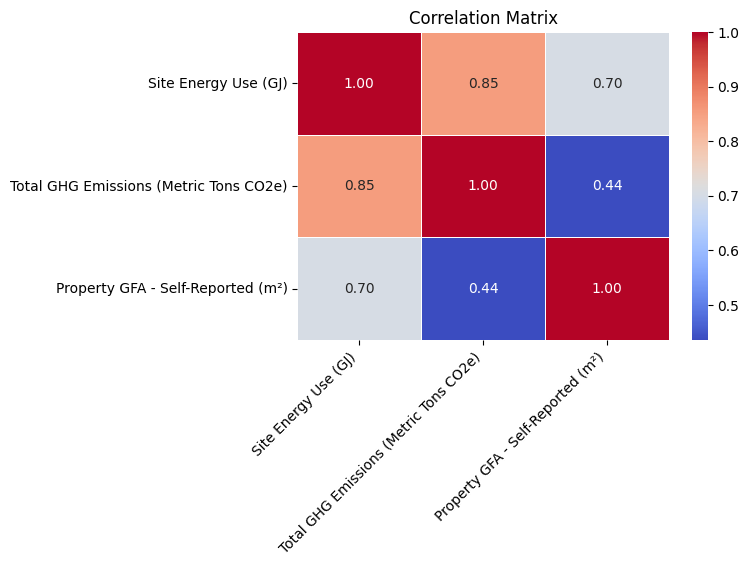

In [70]:
# Compute and visualize correlation matrix between energy consumption, emissions, and building size
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_data = dt_energy[['Site Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (m²)']]

matrix = corr_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()


In [71]:
# identify strong correlations and explain their implications

There are 2 most strong positive correlations.

1. the correlation between 'Site Energy Use' and 'Total GHG Emissions':

with the correlation of **(0.85)**, it is well known that as buildings consume more energy, GHG emissions increases. The reason is because these energy consumptions relies on fossil fuels. It might be better to use renewable energy sources to reduce GHG emissions.

2. the correlation between 'Site Energy Use' and 'Property GFA':

the correlation of **(0.70)** indicates that larger buildings consume more energy and this matter is because of lare floor areas that requires more light, heat, and cooling. Perhaps with energy-efficient appliances in big and large properties, it can be more efficient.



###4.2 Hypothesis Testing

In [72]:
# conduct a t-test comparing average Energy Star Score between 2 different property types (Offices vs. Residential Buildings)

# we have already dropped Energy Star Score because it had more than 40% missing values
# even doing the t-test on Energy Star Score will give a NaN value.
from scipy.stats import ttest_ind
offices = energy_data[energy_data['Primary Property Type - Self Selected'] == 'Office']['ENERGY STAR Score']
residential = energy_data[energy_data['Primary Property Type - Self Selected'] == 'Multifamily Housing']['ENERGY STAR Score']

t_value, p_value = ttest_ind(offices, residential, nan_policy='omit')
print(f"T-value: {t_value}")
print(f"P-value: {p_value}")

T-value: nan
P-value: nan


In [73]:
# interpret the results and discuss statistical significance

Hypothetically, let's say this test worked.

We chose alpha to be **0.05** and we compare p-value with alpha.

if p-value <= alpha: it would have rejected the null hypothesis

if p-value > alpha: the test would have failed to reject the null hypothesis and there would be a signifcant difference in energy consumption between the two property types.






